In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. how to check the normality of the data
2. z test
3. t test
4. chi-square test

In [3]:
data = pd.read_csv(r"https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep=";")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data["volatile acidity"]

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

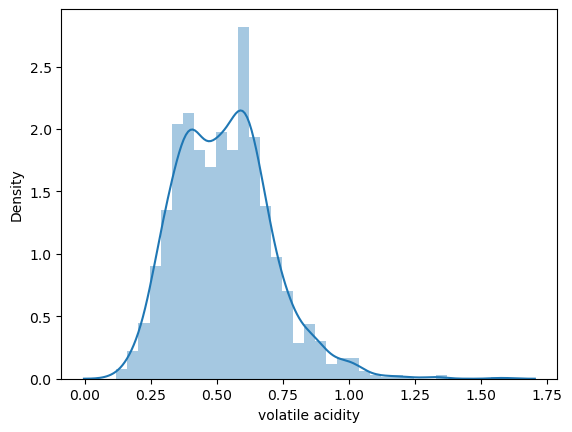

In [7]:
sns.distplot(data["volatile acidity"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

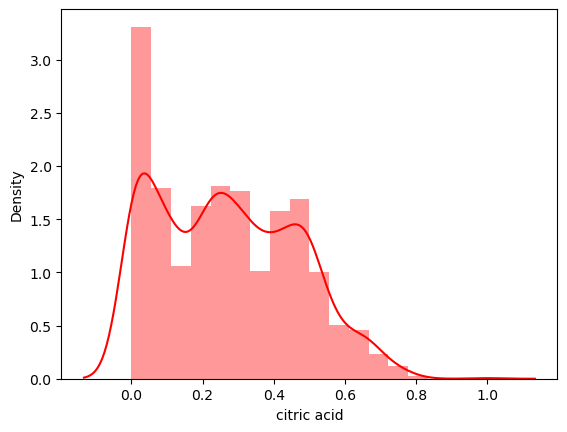

In [8]:
sns.distplot(data["citric acid"], color = "r")

In [9]:
from scipy import stats
stats.shapiro(data["volatile acidity"])

ShapiroResult(statistic=0.9743338823318481, pvalue=2.686385373947307e-16)

In [10]:
stats.shapiro(data["citric acid"])# statistics == C.I

ShapiroResult(statistic=0.955294668674469, pvalue=1.0233944777578548e-21)

In [ ]:
p<0.05 # reject null hypothesis

In [13]:
from numpy.random import randn
mydata = randn(1000)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

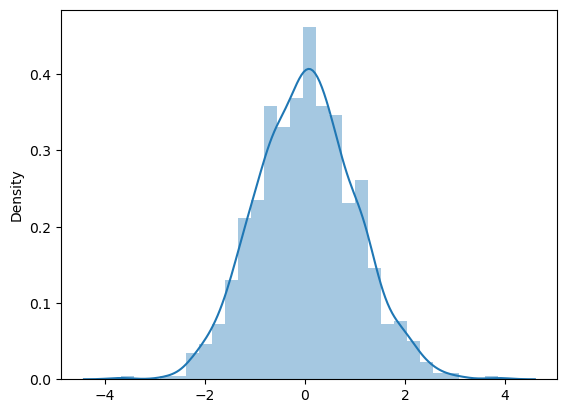

In [14]:
sns.distplot(mydata)

In [16]:
result = stats.shapiro(mydata)

In [17]:
result

ShapiroResult(statistic=0.998627781867981, pvalue=0.6398009657859802)

Null hypothesis == normalize data

In [22]:
alpha = 0.05
p_value = result[1]
if p_value <= alpha:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


In [20]:
from scipy import stats
stats.normaltest(data["citric acid"])

NormaltestResult(statistic=152.039214793795, pvalue=9.662822259281018e-34)

In [23]:
stats.normaltest(mydata)

NormaltestResult(statistic=2.3590861222303543, pvalue=0.30741917828901105)

In [27]:
sample_mean_iq = 110
std_dev = 15
mean_population =100
alpha = 0.05
ci = 0.95

In [29]:
data = std_dev*randn(50) + mean_population

In [30]:
np.mean(data)

99.7792392260479

In [31]:
np.std(data)

16.008517671900222

In [36]:
null_value = 100

In [37]:
from statsmodels.stats.weightstats import ztest
ztest(data, value=null_value, alternative="larger")

(-0.09653144965302873, 0.5384507513309675)

t test vs z test
1. sample size less than 30
2. pop var/pop 


T-test
1. One sample t-test(with respect to one independent sample)
2. Two sample t-test(with respect to two independent sample)
3. paired t-test(two sample from the same population on different time interval)

In [38]:
import random
import numpy as np
population = np.random.randint(10,50,50)

In [39]:
sample1 = np.random.choice(population,20)
sample2 = np.random.choice(population,20)

In [40]:
sample1

array([38, 32, 42, 18, 19, 24, 26, 26, 47, 26, 10, 16, 46, 29, 18, 10, 10,
       45, 26, 26])

In [41]:
sample1.mean()

26.7

In [42]:
sample2

array([26, 47, 26, 28, 32, 32, 40, 26, 41, 46, 39, 19, 47, 19, 47, 40, 15,
       10, 24, 10])

In [43]:
sample2.mean()

30.7

In [44]:
my_cricket_score = [38, 32, 42, 18, 19, 24, 26, 26, 47, 26, 10, 16, 46, 29, 18, 10, 10,
       45, 26, 26]


In [45]:
virat_cricket_score = [26, 47, 26, 28, 32, 32, 40, 26, 41, 46, 39, 19, 47, 19, 47, 40, 15,
       10, 24, 10]

In [46]:
sum(virat_cricket_score)/len(virat_cricket_score)

30.7

In [47]:
np.mean(my_cricket_score)

26.7

In [50]:
import scipy
scipy.stats.ttest_1samp(my_cricket_score, 25)# null hypothesis = 25

Ttest_1sampResult(statistic=0.6393984031268978, pvalue=0.5301981180984684)

In [51]:
result[1]

0.6398009657859802

In [ ]:
p_value <= 0.05 # reject the null hypothesis
p_value > 0.05 # accept the null hypothesis

In [52]:
# two sample test 
first_sample_mean = np.mean(my_cricket_score)
second_sample_mean = np.mean(virat_cricket_score)


In [53]:
print(first_sample_mean)
print(second_sample_mean)

26.7
30.7


In [55]:
scipy.stats.ttest_ind(my_cricket_score,virat_cricket_score)

Ttest_indResult(statistic=-1.045304015350875, pvalue=0.3024865598129672)

In [56]:
my_cricket_score_from_first_inning = [22, 32, 42, 18, 19, 24, 46, 26, 47, 26, 16, 16, 46, 29, 18, 10, 10,
       45, 36, 26]
my_second_inning = [25, 47, 26, 38, 32, 39, 40, 26, 41, 42, 39, 19, 47, 19, 47, 40, 15,
       10, 24, 10]


In [57]:
first_sample_mean = np.mean(my_cricket_score_from_first_inning)
second_sample_mean = np.mean(my_second_inning)


In [58]:
print(first_sample_mean)
print(second_sample_mean)

27.7
31.3


In [59]:
scipy.stats.ttest_rel(my_cricket_score_from_first_inning,my_second_inning)

Ttest_relResult(statistic=-0.956511458929472, pvalue=0.35082717923726614)

#### chi-square test

In [66]:
dataset= sns.load_dataset('tips')

In [67]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])

In [71]:
dataset_array = dataset_table.values

In [72]:
import scipy.stats as stats

In [75]:
print(f"Observed vlaue(real value): \n{dataset_array}")

Observed vlaue(real value): 
[[60 97]
 [33 54]]


In [77]:
stats_test, p, dof, expected_value =stats.chi2_contingency(dataset_array)

In [78]:
p

1.0

In [79]:
expected_value

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [80]:
print(f"Observed vlaue(real value): \n{dataset_array}")

Observed vlaue(real value): 
[[60 97]
 [33 54]]


In [85]:
num_of_rows =dataset_table.iloc[0:2,0]

In [83]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [86]:
num_of_columns= dataset_table.iloc[0,0:2]

In [87]:
num_of_columns

smoker
Yes    60
No     97
Name: Male, dtype: int64

In [88]:
num_of_rows

sex
Male      60
Female    33
Name: Yes, dtype: int64

In [89]:
dof = (len(num_of_rows) -1)*(len(num_of_columns) -1)

In [90]:
dof

1

In [91]:
for o,e in zip(dataset_array,expected_value):
    print(o,e)

[60 97] [59.84016393 97.15983607]
[33 54] [33.15983607 53.84016393]


In [93]:
from scipy.stats import chi2
chisqure_test = sum([(o-e)**2./e for o,e in zip(dataset_array,expected_value)])

In [94]:
chisqure_test

array([0.00119737, 0.00073745])

In [99]:
chisqure_stat = chisqure_test[0] + chisqure_test[0]

In [95]:
alpha = 0.05

In [96]:
dof

1

In [100]:
critical_value = chi2.ppf(1-alpha, df = dof)# percent point function

In [103]:
if chisqure_stat >= critical_value:
    print("Reject H0, There is  relationship between both sex and smoke")
else:
    print("Retain H0, There is no relationship between both sex and smoke")

Retain H0, There is no relationship between both sex and smoke


In [104]:
p_value= 1- chi2.cdf(x= chisqure_stat,df=dof)

In [105]:
p_value

0.960970280457331